In [36]:
import pandas as pd
import datetime
from datetime import datetime
import sqlalchemy
import mysql.connector
import sqlite3
import pandas as pd
import getDays
import pymysql as dbapi

#
# Get some time/date info
#

todayInfo = getDays.getToday()
yesterdayInfo = getDays.getYesterday()
print(todayInfo)
print(yesterdayInfo)
tomorrowInfo = getDays.getTomorrow()

month, month_num, date, year = todayInfo[0], todayInfo[1], todayInfo[2], todayInfo[3]
yesterday = yesterdayInfo[2]
yesterday = int(yesterday)
month_num = int(month_num)
nextDay = tomorrowInfo[2]
nextDay = int(nextDay)
date = int(date)

#
# Get data from the table
#

QUERY = """SELECT * FROM davisF6 
           WHERE month = %s""" % (month_num)


db = dbapi.connect(host='3.135.162.69',user='chuckwx',passwd='jfr716!!00', database = 'davisf6')

cur = db.cursor()
cur.execute(QUERY)
records = cur.fetchall()

#
# Dump the data into a pandas DataFrame
#

df = pd.DataFrame(records, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'Rainfall', 'Max_Dew_Point'])
df

#
# Dump the data into a pandas DataFrame
#

df = pd.DataFrame(records, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'Rainfall', 'Max_Dew_Point'])
df

('October', '10', '9', '2023')
('October', '10', '8', '2023')


,index,Year,Month,Date,High,Low,Rainfall,Max_Dew_Point
0,57,2023,10,1,75,58,0,64
1,58,2023,10,2,73,58,0,65
2,59,2023,10,3,77,54,0,66
3,60,2023,10,4,78,57,0,69
4,62,2023,10,5,74,55,0,68
5,63,2023,10,6,74,68,0,70
6,64,2023,10,7,71,54,0.14,69
7,65,2023,10,8,63,48,0,47


[1 2 3 4 5 6 7 8] [75 73 77 78 74 74 71 63] [58 58 54 57 55 68 54 48] ['0' '0' '0' '0' '0' '0' '0.14' '0']
index              int64
Year              object
Month             object
Date               int64
High               int64
Low                int64
Rainfall          object
Max_Dew_Point     object
rainfall         float64
dtype: object


FileNotFoundError: [Errno 2] No such file or directory: '/var/www/html/trclimate/Rain_test_Davis.png'

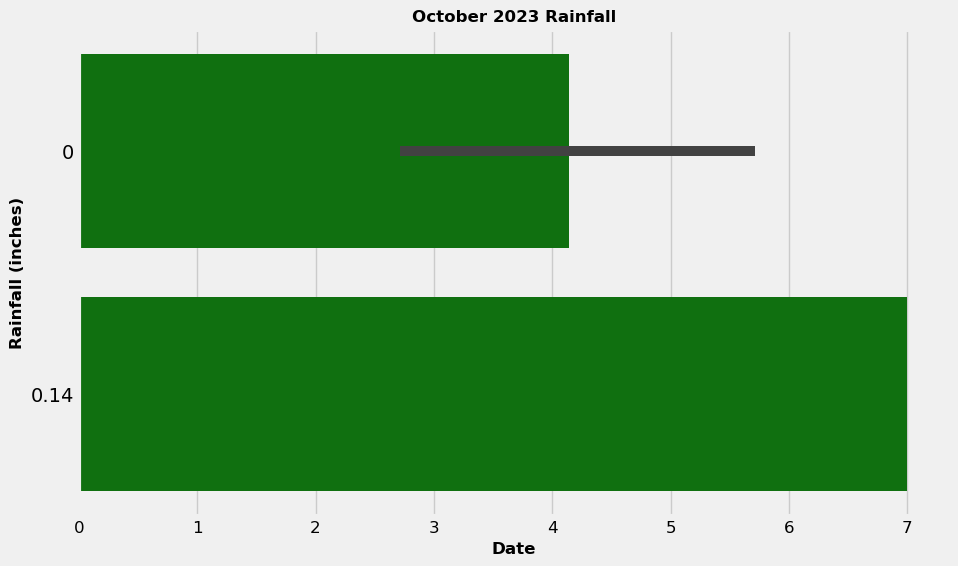

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import numpy as np
import getDays
import seaborn as sns

sta = ['Davis']

for qwe in sta:        
       
    df['Date'] = df['Date'].astype(int)
    df['High'] = df["High"].astype(int)
    df['Low'] = df["Low"].astype(int)
    df['rainfall'] = df["Rainfall"].astype(float)
        
    HI = df['High']
    LO = df["Low"]
    RAINFALL = df["Rainfall"]
    DATE = df["Date"]
    
    y = HI.to_numpy()
    y1 = LO.to_numpy()
    x = DATE.to_numpy()     
    rainfall = RAINFALL.to_numpy()
                
    path1 = '/var/www/html/trclimate/'
        
    plt.style.use('fivethirtyeight')               
    plt.figure(figsize= (10,6))
    plt.xticks(fontsize = 12)
    plt.xlabel('Date', fontsize=12, fontweight ='bold')    
    
    plt.grid(axis = "y", linewidth = 2.0, color = 'black')
    plt.ylabel('Rainfall (inches)', fontsize=12, fontweight ='bold')
   
    plt.bar(x, rainfall, color = "green", width= 0.6)
    plt.grid(True)
    plt.title(f'{month} {year} Rainfall', fontsize=12, fontweight ='bold')
    #plt.autoscale(enable = True, axis = 'both', tight = True)    
    plt.savefig(f'{path1}Rain_test_{qwe}')  